# Misinformation Spreading and Simulations on a Graph

## Simple Cases

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time

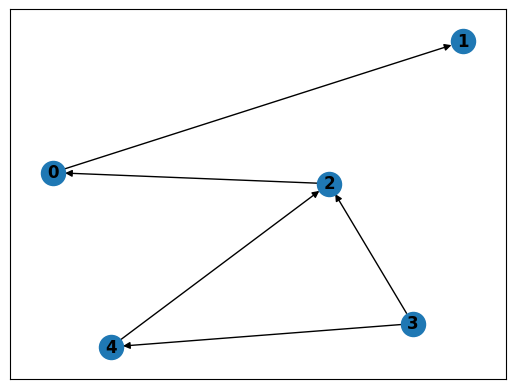

In [2]:
fig, ax = plt.subplots()

sg = nx.fast_gnp_random_graph(n=5, p=0.2, seed=1, directed=True)
pos = nx.spring_layout(sg,seed=5)

nx.draw_networkx_nodes(sg, pos, ax=ax)
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist= sg.edges());

In [3]:
from enum import Enum

class State(Enum):
    SOURCE = 0
    SUSCEPTIBLE = 1
    INFECTED = 2
    RECOVERED = 3
    
STATE2COLOR = {
State.SOURCE: "red",
State.SUSCEPTIBLE: "grey",
State.INFECTED: "orange",
State.RECOVERED: "green"
}

In [4]:
import numpy as np

np.random.seed(1)

for node in sg.nodes:   
    sg.nodes[node]["influence"] = len(list(sg.neighbors(node)))

    if node == 3:
        sg.nodes[node]["state"] = State.SOURCE
        sg.nodes[node]["resistance"] = 0
    else:
        sg.nodes[node]["state"] = State.SUSCEPTIBLE
        sg.nodes[node]["resistance"] = np.random.random()

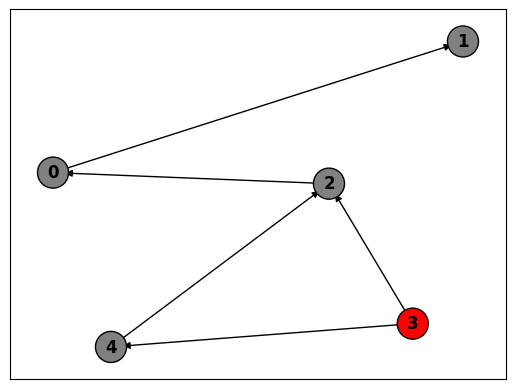

In [5]:
fig, ax = plt.subplots()

# Визначаємо позиції вузлів
pos = nx.spring_layout(sg, seed=5)

# Кольори вузлів на основі їх стану
node_colors = [STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes]

# Малюємо граф
nx.draw_networkx_nodes(sg, pos, ax=ax, node_color=node_colors, edgecolors='black', node_size=500)
nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
nx.draw_networkx_edges(sg, pos, ax=ax, edgelist=sg.edges())

plt.show()

In [6]:
{node: sg.nodes[node]["state"] for node in sg.nodes}

{0: <State.SUSCEPTIBLE: 1>,
 1: <State.SUSCEPTIBLE: 1>,
 2: <State.SUSCEPTIBLE: 1>,
 3: <State.SOURCE: 0>,
 4: <State.SUSCEPTIBLE: 1>}

In [7]:
{node: sg.nodes[node]["resistance"] for node in sg.nodes}

{0: 0.417022004702574,
 1: 0.7203244934421581,
 2: 0.00011437481734488664,
 3: 0,
 4: 0.30233257263183977}

In [31]:
def update_state(sg, sg_copy, node):
    # update states in sg_copy to achieve simultaneous updates
    successors = set(sg.neighbors(node))
    predecessors = set(nx.all_neighbors(sg,node)) - successors
    state = sg.nodes[node]["state"]
    
    if state == State.SOURCE:
        return
        
    elif state == State.RECOVERED:
        condition = np.random.random()
        print(f"\tЯкщо стан RECOVERED: > {condition}")
        
        if sg.nodes[node]["resistance"] > condition:
            sg.nodes[node]["resistance"] = min(sg.nodes[node]["resistance"]*2, sg.nodes[node]["resistance"] + np.random.random(), 1)
        else:
            sg_copy.nodes[node][state] = State.SUSCEPTIBLE
            
    elif state == State.SUSCEPTIBLE:
        source_influenced = State.SOURCE in [sg_copy.nodes[pre]["state"] for pre in predecessors]
        infected_influenced = State.INFECTED in [sg_copy.nodes[pre]["state"] for pre in predecessors]
        if source_influenced or infected_influenced:
            condition = np.random.random()
            print(f"\tЯкщо стан SUSCEPTIBLE: < {condition}")
            
            if sg.nodes[node]["resistance"] < condition:
                sg_copy.nodes[node]["state"] = State.INFECTED
                
    elif state == State.INFECTED:
        # infected has a chance to become recovered
        condition = np.random.random()
        print(f"\tЯкщо стан INFECTED: > {condition}")
        
        if sg.nodes[node]["resistance"] > condition:
            sg_copy.nodes[node]["state"] = State.RECOVERED
        else:
            sg.nodes[node]["resistance"] = max(sg.nodes[node]["resistance"]/2, sg.nodes[node]["resistance"] - np.random.random())
    else:
        print("Unsupported state, exit.")

In [9]:
def visualize_graph(sg, step=None):
    fig, ax = plt.subplots()
    pos = nx.spring_layout(sg, seed=5)  # Використовуємо те саме розташування вузлів
    node_colors = [STATE2COLOR[sg.nodes[node]["state"]] for node in sg.nodes]
    
    nx.draw_networkx_nodes(sg, pos, ax=ax, node_color=node_colors, edgecolors='black', node_size=500)
    nx.draw_networkx_labels(sg, pos, ax=ax, font_weight='bold')
    nx.draw_networkx_edges(sg, pos, ax=ax, edgelist=sg.edges())

    # Малюємо опір для кожної вершини сірим кольором
    resistance_labels = {node: f"{sg.nodes[node]['resistance']:.7f}" for node in sg.nodes}
    label_offset = 0.12  # Зміщення мітки для підняття
    pos_labels = {node: (x, y + label_offset) for node, (x, y) in pos.items()}  # Піднімаємо мітки
    
    nx.draw_networkx_labels(sg, pos_labels, ax=ax, labels=resistance_labels, font_size=10, font_color='#595959', font_weight='bold')
    

    if step != None:
        plt.title(f"Step {step}")
        
    plt.show()
    time.sleep(1)  # Затримка для перегляду кожного кроку

node = 0
	Стан = State.SUSCEPTIBLE


node = 1
	Стан = State.SUSCEPTIBLE


node = 2
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.14675589081711304


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.0923385947687978




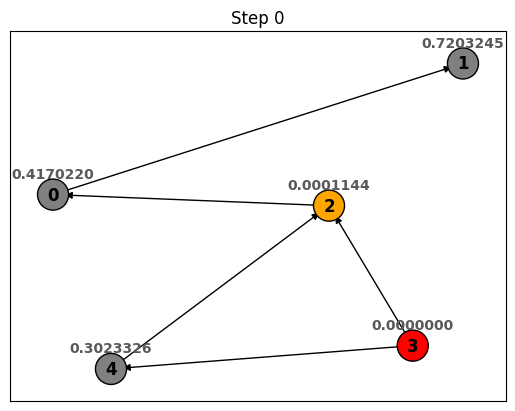

node = 0
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.1862602113776709


node = 1
	Стан = State.SUSCEPTIBLE


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.34556072704304774


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.538816734003357




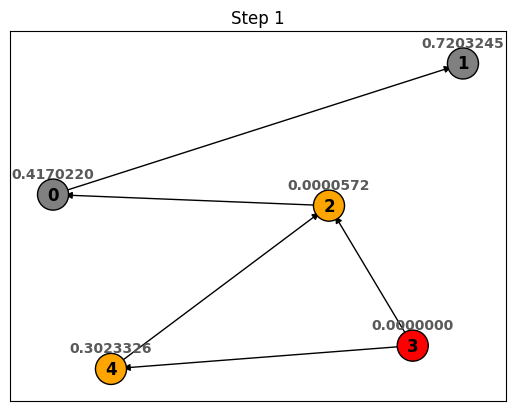

node = 0
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.4191945144032948


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6852195003967595


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.20445224973151743


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.027387593197926163




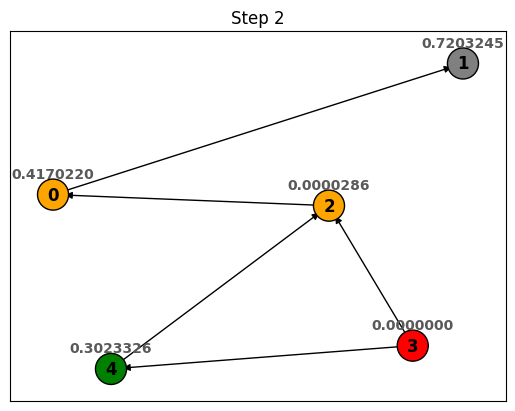

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6704675101784022


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.5586898284457517


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.14038693859523377


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.8007445686755367




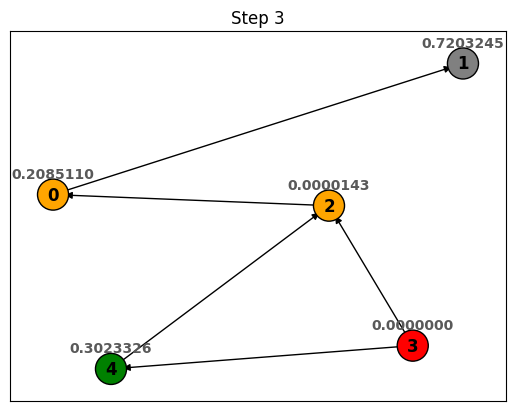

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9682615757193975


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6923226156693141


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8763891522960383


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.08504421136977791




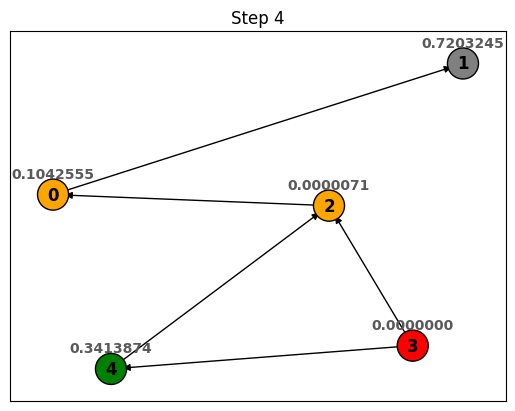

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.1698304195645689


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.0983468338330501


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.42110762500505217


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.5331652849730171




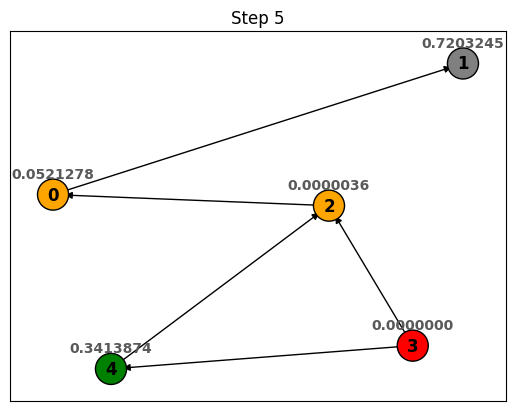

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6918771139504734


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6865009276815837


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8346256718973729


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7501443149449675




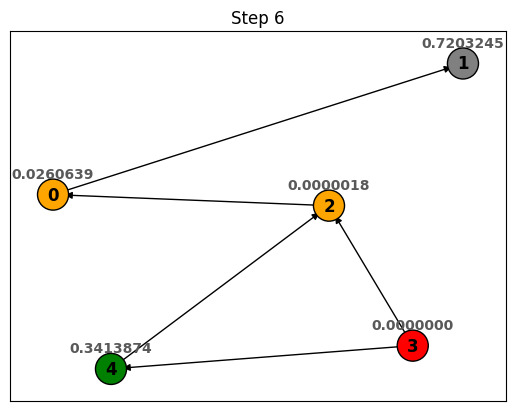

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9888610889064947


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.2804439920644052


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.7892793284514885


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.44789352617590517




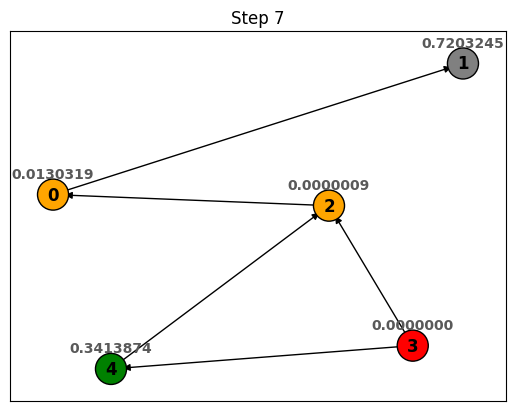

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9085955030930956


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.28777533858634874


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.13002857211827767


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.678835532939891




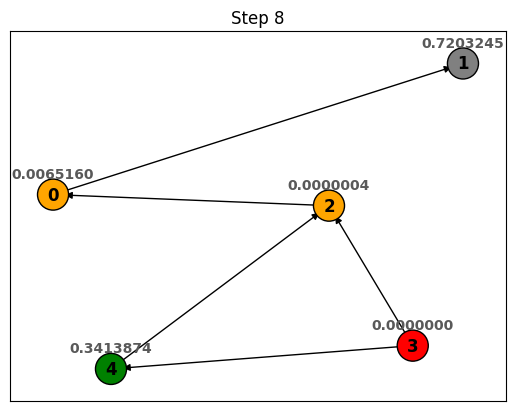

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.21162811600005904


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.4915731592803383


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.053362545117080384


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.14672857490581015




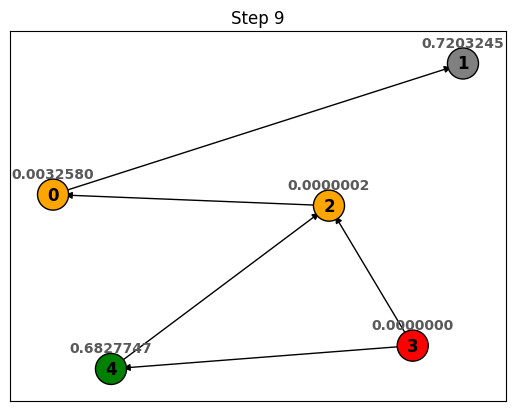

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6997583600209312


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.4140559878195683


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6944001577277451


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.04995345894608716




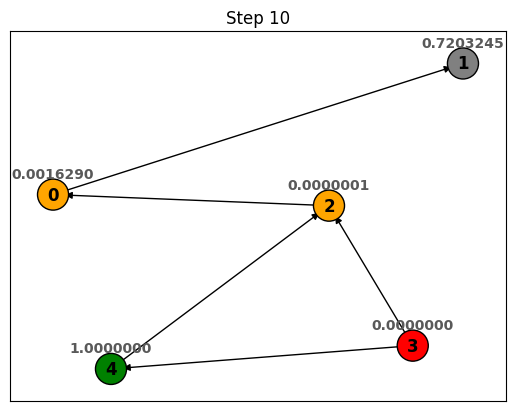

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6637946452197888


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.9445947559908133


node = 2
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5865550405019929


node = 3
	Стан = State.SOURCE


node = 4
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.13747470414623753




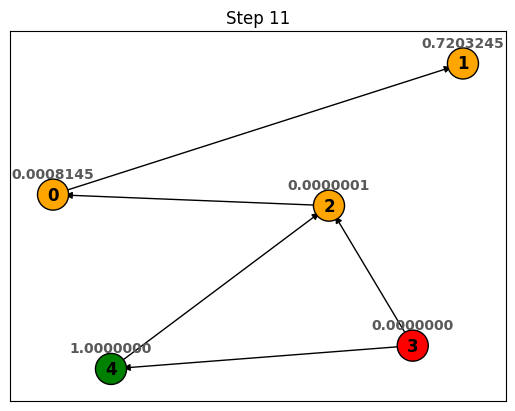

In [10]:
# Симуляція з виведенням графу на кожному кроці
for step in range(12):
    sg_copy = sg.copy()
    for node in sg.nodes:
        print(f"node = {node}")
        print(f"\tСтан = {sg.nodes[node]['state']}")

        update_state(sg, sg_copy, node)
        
        s = {node: sg.nodes[node]["state"].name for node in sg.nodes}
        print("\n")
    # Оновлюємо стани вузлів
    for node in sg.nodes:
        sg.nodes[node]["state"] = sg_copy.nodes[node]["state"]
    
    # Візуалізуємо граф на кожному кроці
    visualize_graph(sg, step)

#### 10 accounts and different topology like small community

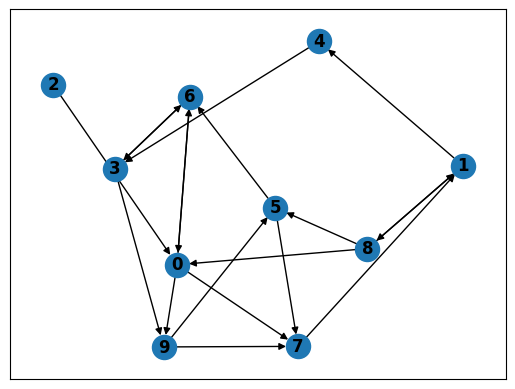

In [11]:
figure, ax_ = plt.subplots()

community_graph = nx.fast_gnp_random_graph(n=10, p=0.2, seed=6, directed=True)
possition = nx.spring_layout(community_graph, seed=5)

nx.draw_networkx_nodes(community_graph, possition, ax=ax_)
nx.draw_networkx_labels(community_graph, possition, ax=ax_, font_weight='bold')
nx.draw_networkx_edges(community_graph, possition, ax=ax_, edgelist= community_graph.edges());

In [12]:
np.random.seed(1)

for node in community_graph.nodes:   
    community_graph.nodes[node]["influence"] = len(list(community_graph.neighbors(node)))

    if node == 4 or node == 2:
        community_graph.nodes[node]["state"] = State.SOURCE
        community_graph.nodes[node]["resistance"] = 0
    else:
        community_graph.nodes[node]["state"] = State.SUSCEPTIBLE
        community_graph.nodes[node]["resistance"] = np.random.random()

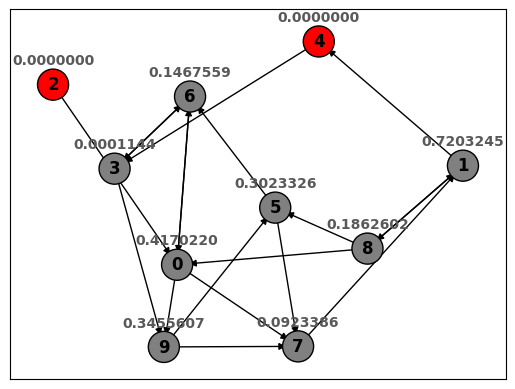

In [13]:
visualize_graph(community_graph)

node = 0
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.39676747423066994


node = 1
	Стан = State.SUSCEPTIBLE


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.538816734003357


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.SUSCEPTIBLE


node = 6
	Стан = State.SUSCEPTIBLE


node = 7
	Стан = State.SUSCEPTIBLE


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.4191945144032948




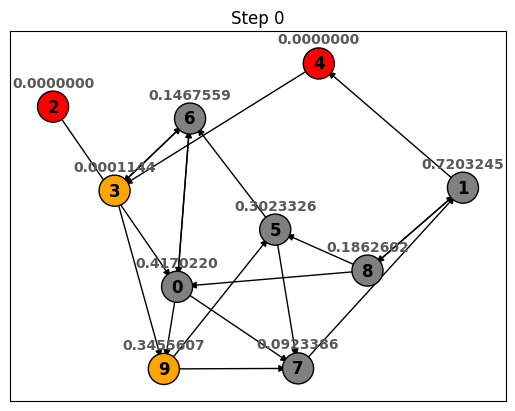

node = 0
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6852195003967595


node = 1
	Стан = State.SUSCEPTIBLE


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.20445224973151743


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.027387593197926163


node = 6
	Стан = State.SUSCEPTIBLE


node = 7
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6704675101784022


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.41730480236712697




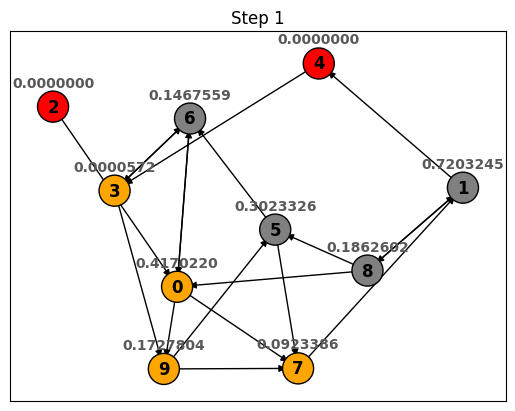

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.14038693859523377


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.1981014890848788


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8007445686755367


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.31342417815924284


node = 6
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6923226156693141


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8763891522960383


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.08504421136977791




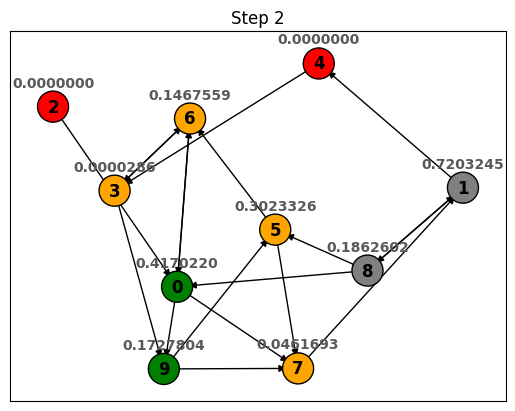

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.03905478323288236


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.8781425034294131


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.0983468338330501


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9578895301505019


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6918771139504734


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6865009276815837


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.018288277344191806




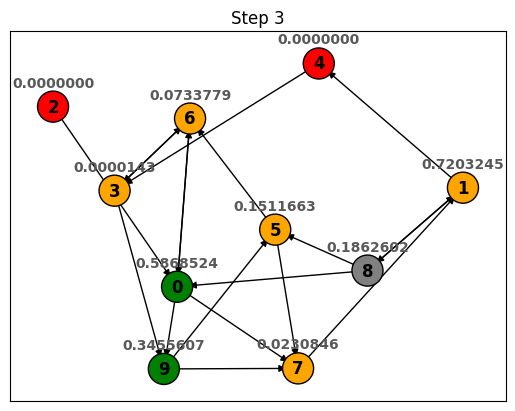

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.9888610889064947


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.7481656543798394


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.7892793284514885


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.44789352617590517


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.2936141483736795


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.13002857211827767


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.678835532939891




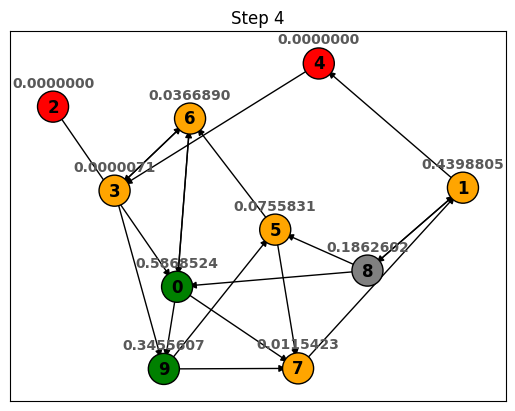

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.21162811600005904


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.4915731592803383


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5741176054920131


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5893055369032842


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.10233442882782584


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6944001577277451


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.04995345894608716




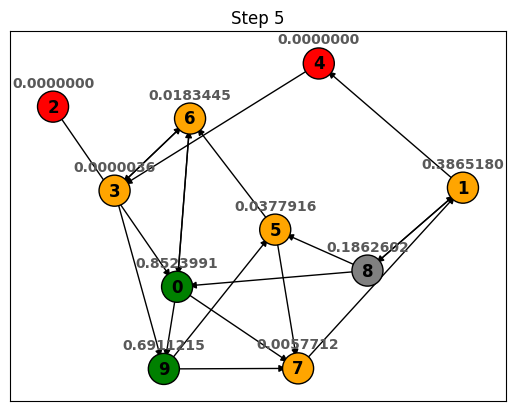

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.6637946452197888


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9445947559908133


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9034019152878835


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.13927634725075855


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.3976768369855336


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9275085803960339


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7508121031361555




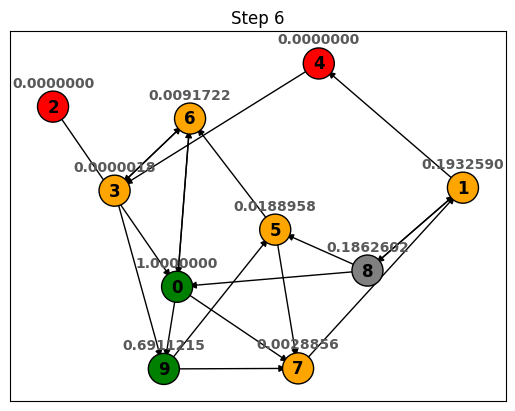

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7259979853504515


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6236722070556089


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.34889834197784253


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8958862181960668


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9648400471483856


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6216957202091218


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.9494892587070712




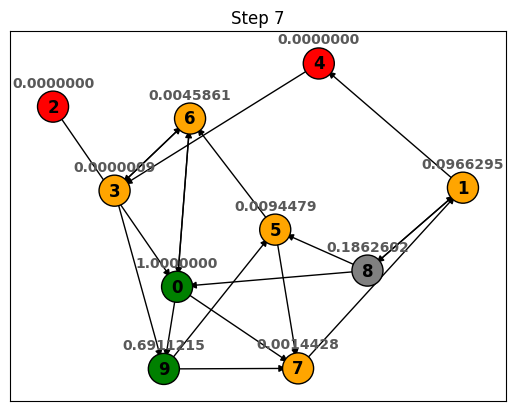

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.4499121334799405


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.40813680276128117


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9033795205622538


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.00287032703115897


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6171449136207239


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5270581022576093


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.35726976000249977




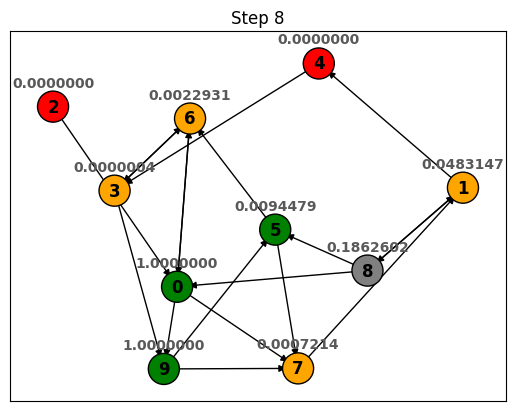

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.6233601157918027


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9294372337437613


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9973228504514805


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.13713574962887776


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9325954630371636


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.06600017272206249


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7538761884612464




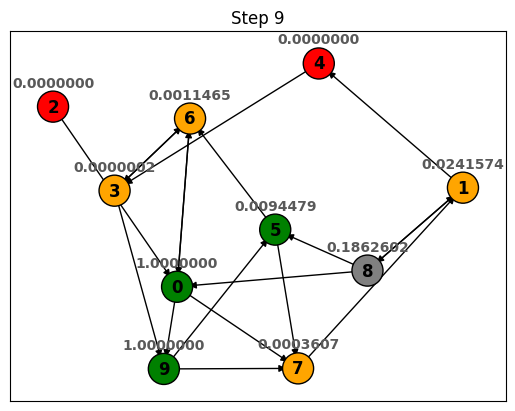

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7115247586284718


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.01988013383979559


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.026210986877719278


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.2462110676030459


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.860027948682888


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5528219786857659


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.12417331511991114




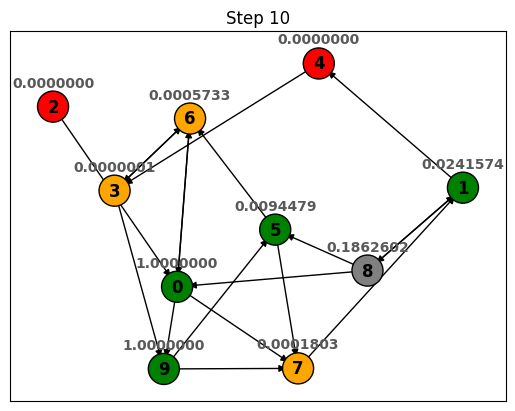

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.5857592714582879


node = 1
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.56103021925571


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.01864728937294302


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.23297427384102043


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8071051956187791


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8635418545594287


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.5562402339904189




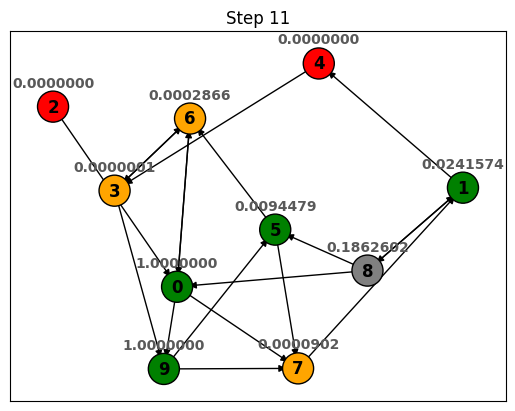

In [14]:
# Симуляція з виведенням графу на кожному кроці
for step in range(12):
    graph_copy = community_graph.copy()
    for node in community_graph.nodes:
        print(f"node = {node}")
        print(f"\tСтан = {community_graph.nodes[node]['state']}")

        update_state(community_graph, graph_copy, node)
        
        s = {node: community_graph.nodes[node]["state"].name for node in community_graph.nodes}
        print("\n")
    # Оновлюємо стани вузлів
    for node in community_graph.nodes:
        community_graph.nodes[node]["state"] = graph_copy.nodes[node]["state"]
    
    # Візуалізуємо граф на кожному кроці
    visualize_graph(community_graph, step)

node = 0
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.39676747423066994


node = 1
	Стан = State.SUSCEPTIBLE


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.538816734003357


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.SUSCEPTIBLE


node = 6
	Стан = State.SUSCEPTIBLE


node = 7
	Стан = State.SUSCEPTIBLE


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.4191945144032948




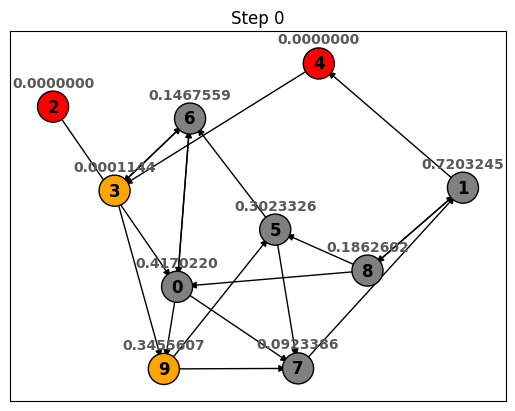

node = 0
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6852195003967595


node = 1
	Стан = State.SUSCEPTIBLE


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.20445224973151743


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.027387593197926163


node = 6
	Стан = State.SUSCEPTIBLE


node = 7
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6704675101784022


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.41730480236712697




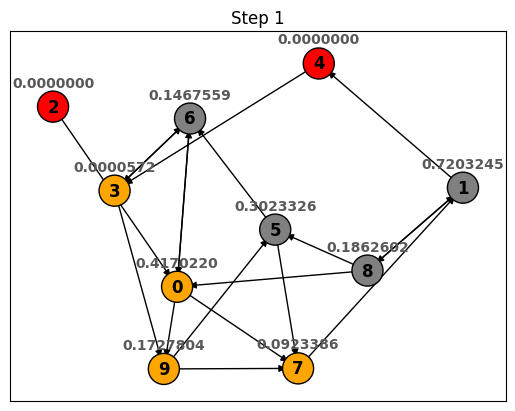

node = 0
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.14038693859523377


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.1981014890848788


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8007445686755367


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.31342417815924284


node = 6
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.6923226156693141


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8763891522960383


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.08504421136977791




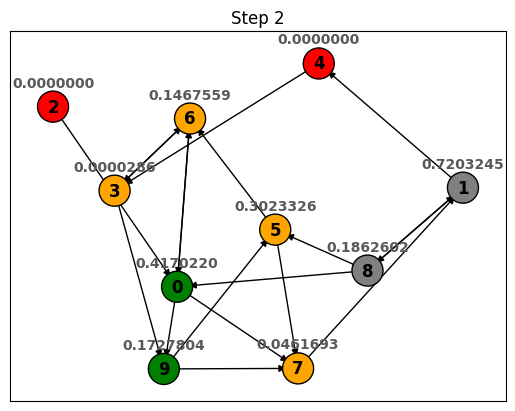

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.03905478323288236


node = 1
	Стан = State.SUSCEPTIBLE
	Якщо стан SUSCEPTIBLE: < 0.8781425034294131


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.0983468338330501


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9578895301505019


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6918771139504734


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6865009276815837


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.018288277344191806




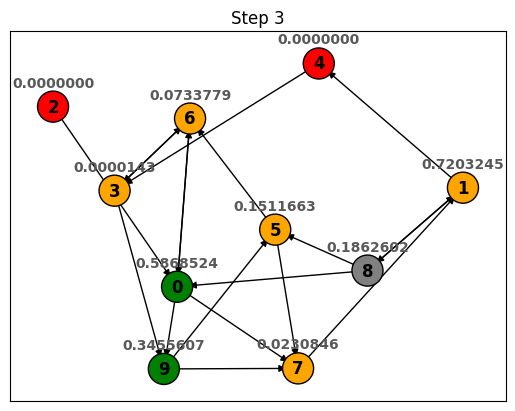

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.9888610889064947


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.7481656543798394


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.7892793284514885


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.44789352617590517


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.2936141483736795


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.13002857211827767


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.678835532939891




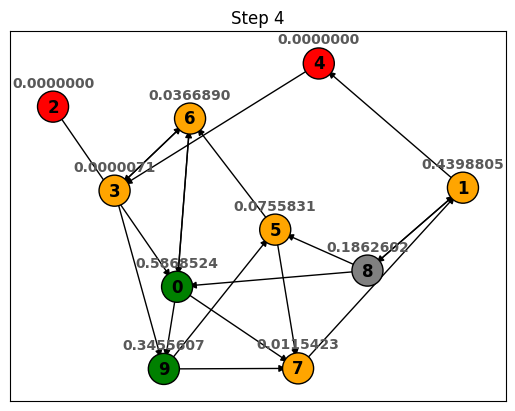

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.21162811600005904


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.4915731592803383


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5741176054920131


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5893055369032842


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.10233442882782584


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6944001577277451


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.04995345894608716




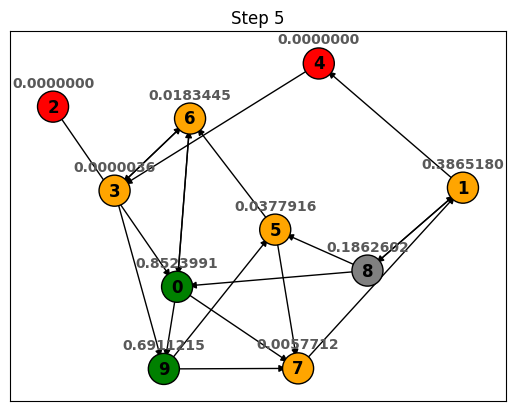

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.6637946452197888


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9445947559908133


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9034019152878835


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.13927634725075855


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.3976768369855336


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9275085803960339


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7508121031361555




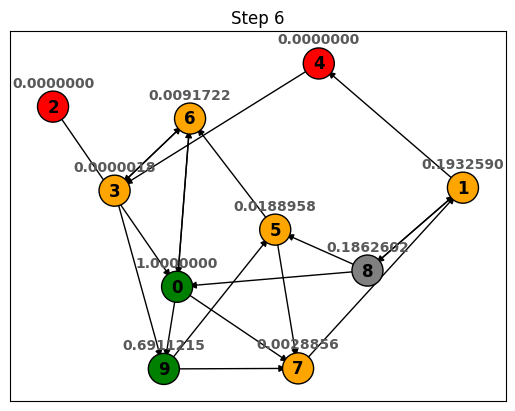

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7259979853504515


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6236722070556089


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.34889834197784253


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8958862181960668


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9648400471483856


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6216957202091218


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.9494892587070712




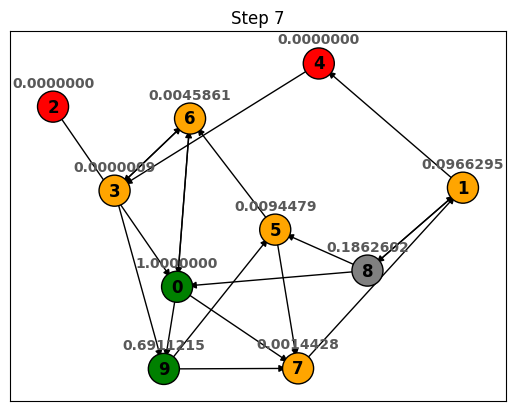

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.4499121334799405


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.40813680276128117


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9033795205622538


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.00287032703115897


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.6171449136207239


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5270581022576093


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.35726976000249977




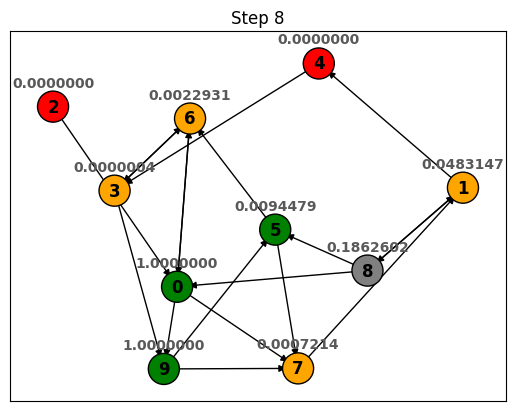

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.6233601157918027


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9294372337437613


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9973228504514805


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.13713574962887776


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.9325954630371636


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.06600017272206249


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7538761884612464




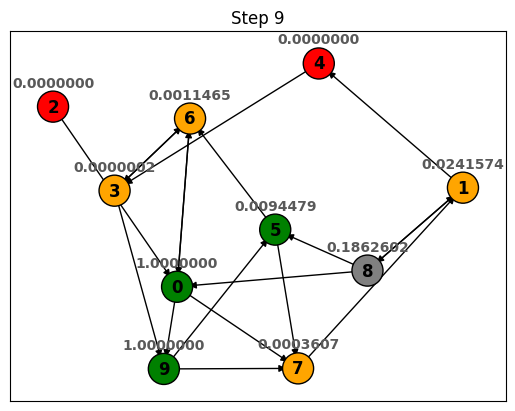

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.7115247586284718


node = 1
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.01988013383979559


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.026210986877719278


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.2462110676030459


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.860027948682888


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.5528219786857659


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.12417331511991114




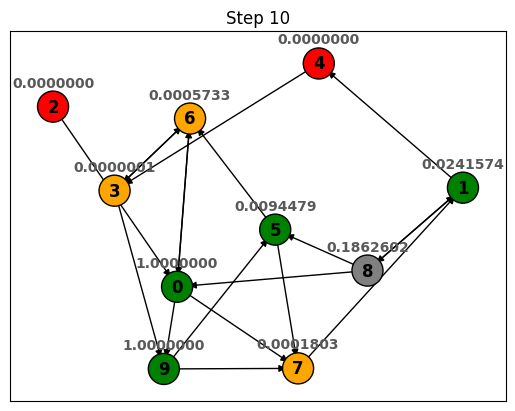

node = 0
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.5857592714582879


node = 1
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.56103021925571


node = 2
	Стан = State.SOURCE


node = 3
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.01864728937294302


node = 4
	Стан = State.SOURCE


node = 5
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.23297427384102043


node = 6
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8071051956187791


node = 7
	Стан = State.INFECTED
	Якщо стан INFECTED: > 0.8635418545594287


node = 8
	Стан = State.SUSCEPTIBLE


node = 9
	Стан = State.RECOVERED
	Якщо стан RECOVERED: > 0.5562402339904189




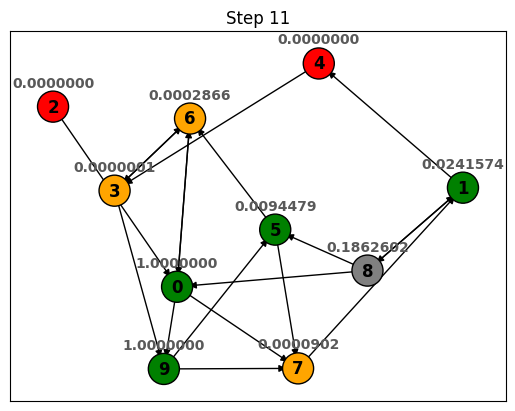

In [14]:
# Симуляція з виведенням графу на кожному кроці
for step in range(12):
    graph_copy = community_graph.copy()
    for node in community_graph.nodes:
        print(f"node = {node}")
        print(f"\tСтан = {community_graph.nodes[node]['state']}")

        update_state(community_graph, graph_copy, node)
        
        s = {node: community_graph.nodes[node]["state"].name for node in community_graph.nodes}
        print("\n")
    # Оновлюємо стани вузлів
    for node in community_graph.nodes:
        community_graph.nodes[node]["state"] = graph_copy.nodes[node]["state"]
    
    # Візуалізуємо граф на кожному кроці
    visualize_graph(community_graph, step)

## Misinformation Spreading on Different Networks

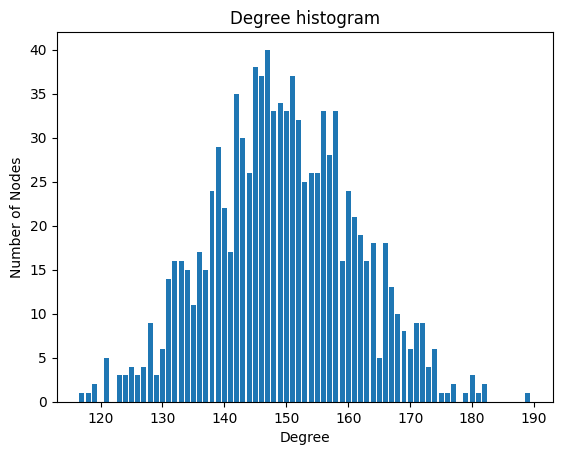

In [16]:
fig, ax = plt.subplots()
bg = nx.fast_gnp_random_graph(n=1000, p=0.15, seed = 1, directed = True)
degree_sequence = sorted((d for n, d in bg.out_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Degree histogram")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of Nodes");

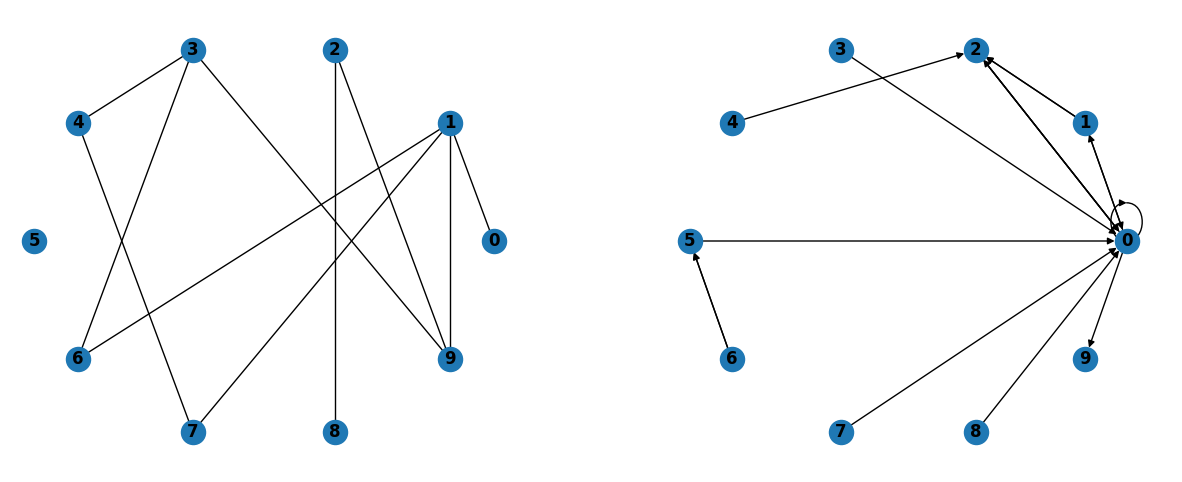

In [18]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

G = nx.fast_gnp_random_graph(n=10, p =0.2, seed = 1)
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', pos = pos, ax = axes[0])

G = nx.scale_free_graph(10)
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', pos = pos, ax = axes[1])

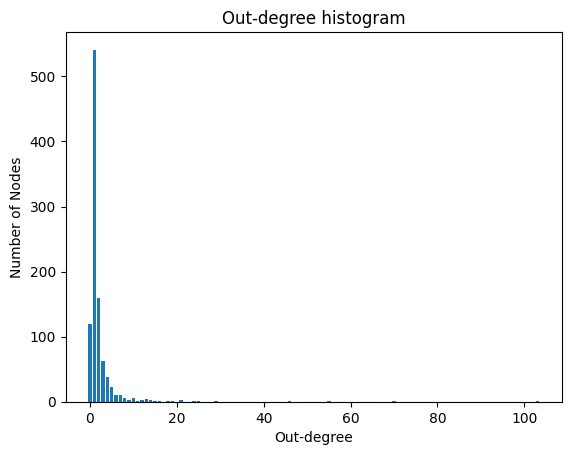

In [23]:
fig, ax = plt.subplots()
g = nx.scale_free_graph(1000)
degree_sequence = sorted((d for n, d in g.out_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Out-degree histogram")
ax.set_xlabel("Out-degree")
ax.set_ylabel("Number of Nodes");

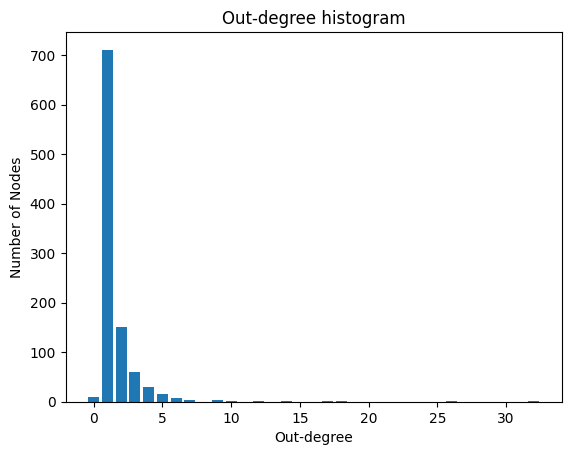

In [24]:
fig, ax = plt.subplots()
g = nx.scale_free_graph(1000, alpha = 0.6, beta = 0.39, gamma = 0.01, seed = 0)
degree_sequence = sorted((d for n, d in g.out_degree()), reverse=True)
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Out-degree histogram")
ax.set_xlabel("Out-degree")
ax.set_ylabel("Number of Nodes");

In [25]:
from collections import Counter

In [26]:
def count_states(g):
    states = [g.nodes[node]["state"] for node in g.nodes]
    return Counter(states)

### bundle our earlier code into several functions:

In [27]:
def initialize(g, top_k = 5):
    tops = sorted(((n, d) for n, d in g.out_degree()), reverse=True, key = lambda pair: pair[1])[:top_k]
    for node in g.nodes:
        g.nodes[node]["influence"] = len(list(g.neighbors(node)))
        if node in [pair[0] for pair in tops]:
            g.nodes[node]["state"] = State.SOURCE
            g.nodes[node]["resistance"] = None
        else:
            g.nodes[node]["state"] = State.SUSCEPTIBLE
            g.nodes[node]["resistance"] = np.random.random()

In [32]:
def update_state(sg, sg_copy, node):
    # update states in sg_copy to achieve simultaneous updates
    successors = set(sg.neighbors(node))
    predecessors = set(nx.all_neighbors(sg,node)) - successors
    state = sg.nodes[node]["state"]
    
    if state == State.SOURCE:
        return
        
    elif state == State.RECOVERED:
      
        if sg.nodes[node]["resistance"] > np.random.random():
            sg.nodes[node]["resistance"] = min(sg.nodes[node]["resistance"]*2, sg.nodes[node]["resistance"] + np.random.random(), 1)
        else:
            sg_copy.nodes[node][state] = State.SUSCEPTIBLE
            
    elif state == State.SUSCEPTIBLE:
        source_influenced = State.SOURCE in [sg_copy.nodes[pre]["state"] for pre in predecessors]
        infected_influenced = State.INFECTED in [sg_copy.nodes[pre]["state"] for pre in predecessors]
        if source_influenced or infected_influenced:
           
            if sg.nodes[node]["resistance"] < np.random.random():
                sg_copy.nodes[node]["state"] = State.INFECTED
                
    elif state == State.INFECTED:
        # infected has a chance to become recovered
        
        if sg.nodes[node]["resistance"] > np.random.random():
            sg_copy.nodes[node]["state"] = State.RECOVERED
        else:
            sg.nodes[node]["resistance"] = max(sg.nodes[node]["resistance"]/2, sg.nodes[node]["resistance"] - np.random.random())
            
    else:
        print("Unsupported state, exit.")

In [33]:
def simulate(g, steps = 100, top_k = 5):
    initialize(g, top_k)
    res = []
    for _ in range(steps):
        g_copy = g.copy()
        
        for node in g.nodes:
            update_state(g, g_copy, node)
        # copy state
        for node in g.nodes:
            g.nodes[node]["state"] = g_copy.nodes[node]["state"]
        res.append(count_states(g))
    return res

In [34]:
def visualize(res):
    steps = range(1, len(res) + 1)
    susceptible = [r.get(State.SUSCEPTIBLE,0) for r in res]
    recovered = [r.get(State.RECOVERED,0) for r in res]
    infected = [r.get(State.INFECTED,0) for r in res]
    fig, ax = plt.subplots()
    ax.plot(steps, susceptible, label="susceptible")
    ax.plot(steps, recovered, label="recovered")
    ax.plot(steps, infected, label="infected")
    plt.legend()

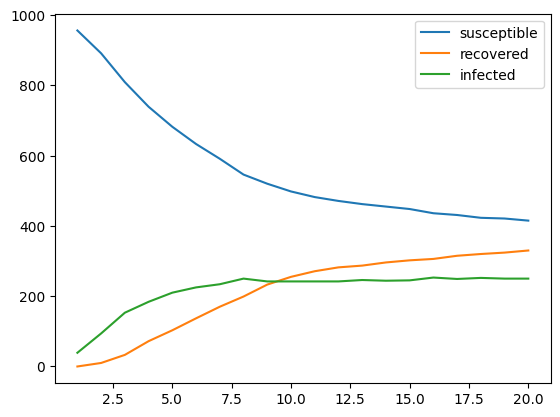

In [62]:
g_normal = nx.fast_gnp_random_graph(n=1000, p=0.002, directed = True)
res = simulate(g_normal, steps = 20, top_k = 5)
visualize(res)

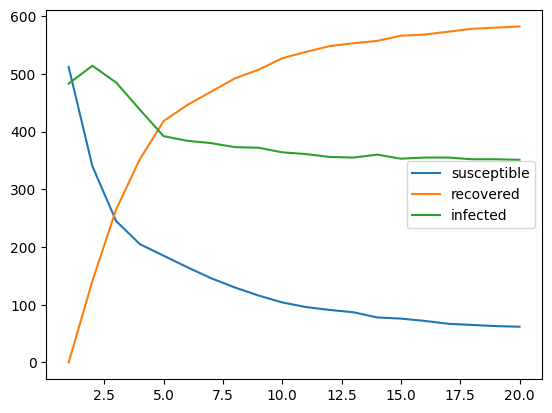

In [56]:
g_normal = nx.fast_gnp_random_graph(n=1000, p=0.05, directed = True)
res = simulate(g_normal, steps = 20, top_k = 5)
visualize(res)

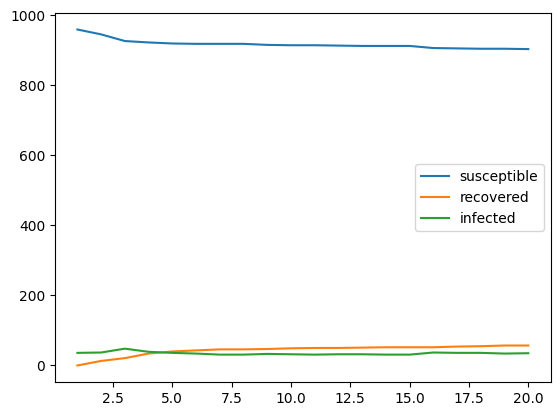

In [40]:
g_scale_free = nx.scale_free_graph(1000, alpha = 0.5, beta = 0.1, gamma = 0.4, delta_out = 0.9)
res = simulate(g_scale_free, steps = 20, top_k = 5)
visualize(res)

#### In the previous graph something is off. The system seems stuck in less than five steps. Let's take a look at the most influential account's neighbors:

In [43]:
tops = sorted(((n, d) for n, d in g_scale_free.out_degree()), reverse=True, key = lambda pair: pair[1])[:5]
tops

[(6, 23), (3, 14), (8, 10), (16, 10), (20, 10)]

#### Let’s examine the neighbors of account 2. We are mostly interested in the number of their followers::

In [44]:
[g_scale_free.out_degree()[k] for k in list(nx.neighbors(g_scale_free,2))]

[6, 2, 1, 0]

In [45]:
def simulate(g, steps=100, top_k=5):
    initialize(g, top_k)
    res = []
    for _ in range(steps):
        g_copy = g.copy()
        for node in g.nodes:
            update_state(g, g_copy, node)
        #copy state
        for node in g.nodes:
            g.nodes[node]["state"] = g_copy.nodes[node]["state"]
        if len(res) > 1 and res[-2] == res[-1] == count_states(g):
            return res
        res.append(count_states(g))
    return res

In [53]:
import networkx as nx
import numpy as np
from collections import Counter
from tabulate import tabulate
import pandas as pd

results = []

for p in [0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4]:
    len_res = []
    infected_rate = []
    recovered_rate = []
    
    for _ in range(1000):
        g_normal = nx.fast_gnp_random_graph(n=100, p=p, directed=True)
        res = simulate(g_normal, steps=1000, top_k=5)
        len_res.append(len(res))
        infected_rate.append(res[-1][State.INFECTED] / 100)
        recovered_rate.append(res[-1][State.RECOVERED] / 100)
    
    # Зберігаємо середні значення для кожного p
    results.append([p, np.mean(len_res), np.mean(infected_rate), np.mean(recovered_rate)])

# Створюємо DataFrame для табличного виводу
df = pd.DataFrame(results, columns=["Probability (p)", "Avg. Simulation Length", "Avg. Infected Rate", "Avg. Recovered Rate"])

# Виводимо таблицю у гарному форматі
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))


+-----------------+------------------------+----------------------+---------------------+
| Probability (p) | Avg. Simulation Length |  Avg. Infected Rate  | Avg. Recovered Rate |
+-----------------+------------------------+----------------------+---------------------+
|      0.001      |         5.093          | 0.018920000000000003 |       0.02468       |
|      0.002      |          5.8           |       0.02487        |       0.03545       |
|      0.004      |         7.179          | 0.04118000000000001  |       0.06067       |
|      0.01       |         10.285         | 0.09617000000000002  | 0.14271999999999999 |
|      0.02       |         14.02          |       0.21942        |       0.33273       |
|      0.04       |         15.319         |       0.30786        | 0.5066400000000001  |
|      0.08       |         15.27          |       0.32506        |       0.55814       |
|       0.1       |         15.613         |       0.32608        |       0.56378       |
|       0.

In [80]:
for p in [0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.4]:
    for _ in range(1000):
        len_res = []
        infected_rate = []
        recovered_rate = []
        g_normal = nx.fast_gnp_random_graph(n=100, p=p, directed = True)
        res = simulate(g_normal, steps = 1000, top_k = 5)
        len_res.append(len(res))
        infected_rate.append(res[-1][State.INFECTED]/100)
        recovered_rate.append(res[-1][State.RECOVERED]/100)
        
    print(p, np.mean(len_res), np.mean(infected_rate), np.mean(recovered_rate))

0.001 6.0 0.03 0.03
0.002 4.0 0.01 0.03
0.004 9.0 0.05 0.07
0.01 12.0 0.1 0.18
0.02 19.0 0.21 0.44
0.04 16.0 0.29 0.56
0.08 20.0 0.36 0.56
0.1 15.0 0.34 0.54
0.2 21.0 0.29 0.61
0.4 11.0 0.41 0.44


## Exercise
<ol>
    <li>Use undirected scale-free graphs to redo the simulation. Check the built-in networkx graph generators to choose the right one</li>
   <li>Each account has an influence property, which should influence how likely its followers are to accept the misinformation. Introduce a mechanism to address such behavior.</li>
</ol>